In [1]:
# importing libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.multivariate.manova as manova

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chi-squared Test

Assume the expected distribution is 50% vegetarian and 50% non-vegetarian. You want to test if your sample data matches this distribution.

Goodness of fit.

In [7]:
print(expected_frequencies)
print(total_meals)

[50. 50.]
100


In [9]:
from scipy.stats import chisquare

# Hypothetical observed frequencies
observed_frequencies = np.array([30, 70])  # e.g., 30 vegetarian and 70 non-vegetarian meals

# Expected frequencies (assuming a 50-50 distribution)
total_meals = observed_frequencies.sum()
expected_frequencies = np.array([total_meals * 0.3, total_meals * 0.7])

# Perform the Chi-Squared test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# print results with if else conditions
if p_value < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")


Chi-Squared Statistic: 0.0
P-value: 1.0
Fail to reject null hypothesis, there is no significant difference between the groups 


In [11]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
from scipy.stats import chi2_contingency
ct=pd.crosstab(df['sex'],df['smoker'])
print(ct)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [14]:
chi, p, dof, ex = chi2_contingency(ct)
print(f'p-value: {p}')
print(f'degrees of freedom: {dof}')
print(f'expected frequencies: {ex}')
print(f'chi-squared: {chi}')
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

p-value: 1.0
degrees of freedom: 1
expected frequencies: [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]
chi-squared: 0.0
Fail to reject null hypothesis, there is no significant difference between the groups 


In [15]:
ct2=pd.crosstab(df['sex'],df['time'])
print(ct2)
chi, p, dof, ex = chi2_contingency(ct2)
print(f'p-value: {p}')
print(f'degrees of freedom: {dof}')
print(f'expected frequencies: {ex}')
print(f'chi-squared: {chi}')
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

time    Lunch  Dinner
sex                  
Male       33     124
Female     35      52
p-value: 0.002237400118075248
degrees of freedom: 1
expected frequencies: [[ 43.75409836 113.24590164]
 [ 24.24590164  62.75409836]]
chi-squared: 9.343808982970623
Reject null hypothesis, there is a significant difference between the groups


In [16]:
ct3=pd.crosstab(df['sex'],df['day'])
print(ct3)
chi, p, dof, ex = chi2_contingency(ct3)
print(f'p-value: {p}')
print(f'degrees of freedom: {dof}')
print(f'expected frequencies: {ex}')
print(f'chi-squared: {chi}')
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

day     Thur  Fri  Sat  Sun
sex                        
Male      30   10   59   58
Female    32    9   28   18
p-value: 0.004180302092822257
degrees of freedom: 3
expected frequencies: [[39.89344262 12.22540984 55.9795082  48.90163934]
 [22.10655738  6.77459016 31.0204918  27.09836066]]
chi-squared: 13.22200137240661
Reject null hypothesis, there is a significant difference between the groups


---
# 2. T-test

## one-sample t-test

<Axes: xlabel='age', ylabel='Count'>

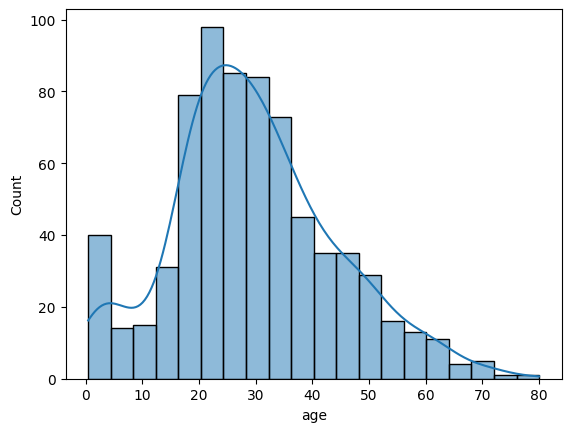

In [22]:
df1=sns.load_dataset('titanic')
sns.histplot(df1['age'], kde=True)

In [23]:
# Shapiro-Wilk Test to check for normality
from scipy.stats import shapiro
stat, p = shapiro(df1['age'])
print('Statistics=%.4f, p=%.20f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.00000000000000000000
Sample looks Gaussian (fail to reject H0)


mu= 35

is there any difference between ages of people and mu?

In [24]:
stats.ttest_1samp(df1['age'], 30)

TtestResult(statistic=nan, pvalue=nan, df=nan)

this is because age has null values init.

In [26]:
df1['age'].fillna(df1['age'].median(), inplace=True)
df1['fare'].fillna(df1['fare'].median(), inplace=True)

In [29]:
stat, p = stats.ttest_1samp(df1['age'], 30)

In [30]:
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Fail to reject null hypothesis, there is no significant difference between the groups 


## two-sample t-test independent

In [46]:
# grouping
age_male=df1[df1['sex']=='male']['age']
age_female=df1[df1['sex']=='female']['age']




In [47]:
stat, p = stats.ttest_ind(age_male,age_female)

In [48]:
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Reject null hypothesis, there is a significant difference between the groups


# 3. Anova

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## One-way Anova

### 1. There is a difference between ages of First, second and third class passengers?
H0: There is no difference.

H1: There is a significant Difference.

In [55]:
model=ols('age ~ pclass', data=df1).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq     df           F        PR(>F)
pclass     17429.695048    1.0  116.122704  1.558883e-25
Residual  133436.428421  889.0         NaN           NaN


In [56]:
# print the results with if else conditions
if anova_table['PR(>F)'][0] < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Reject null hypothesis, there is a significant difference between the groups


C:\Users\ATECH\AppData\Local\Temp\ipykernel_9848\3702339940.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [57]:
# Post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df1['age'], df1['pclass'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -7.0467    0.0 -9.9299 -4.1636   True
     1      3 -10.8795    0.0 -13.226  -8.533   True
     2      3  -3.8328 0.0009 -6.3169 -1.3486   True
----------------------------------------------------


<Axes: xlabel='pclass', ylabel='age'>

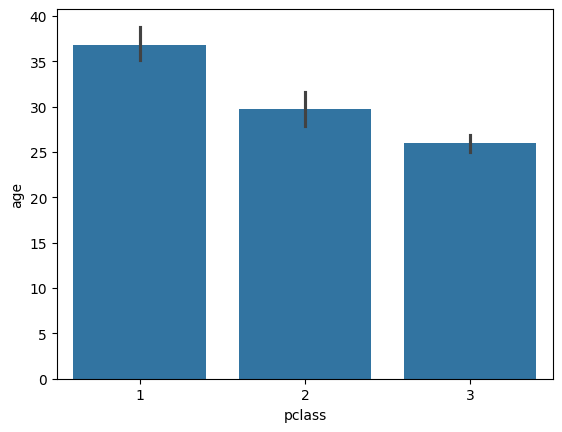

In [59]:
sns.barplot(x='pclass', y='age', data=df1)

## Two-way Anova

In [69]:
model=ols('age ~ sex * who', data=df1).fit()
# this statement is same as
# model=ols('age ~ pclass + who + pclass:who', data=df1).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq     df             F        PR(>F)
sex                NaN    1.0           NaN           NaN
who       1.294561e-10    2.0  5.611466e-13  9.999994e-01
sex:who   5.233208e+04    2.0  2.268412e+02  8.119221e-46
Residual  1.023151e+05  887.0           NaN           NaN


c:\Users\ATECH\.conda\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\ATECH\.conda\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\ATECH\.conda\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [70]:
# Tukey's HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey= pairwise_tukeyhsd(df1['age'], df1['sex'] + df1['who'], alpha=0.05)
print(tukey.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
femalechild femalewoman  24.0084    0.0  19.4706  28.5462   True
femalechild   malechild  -1.7426 0.8815  -7.8152   4.3301  False
femalechild     maleman  24.7693    0.0  20.3881  29.1505   True
femalewoman   malechild  -25.751    0.0 -30.4333 -21.0686   True
femalewoman     maleman   0.7609 0.7773   -1.299   2.8207  False
  malechild     maleman  26.5118    0.0  21.9811  31.0426   True
----------------------------------------------------------------


<Axes: xlabel='who', ylabel='age'>

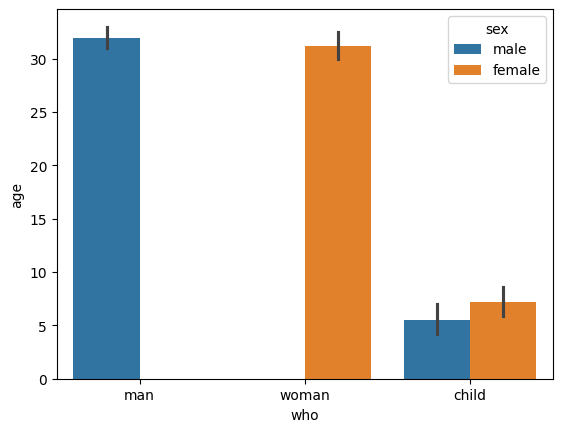

In [73]:
sns.barplot(data=df1, x='who', y='age', hue='sex')


# 4. Correlation

In [74]:
df=df1

<Axes: >

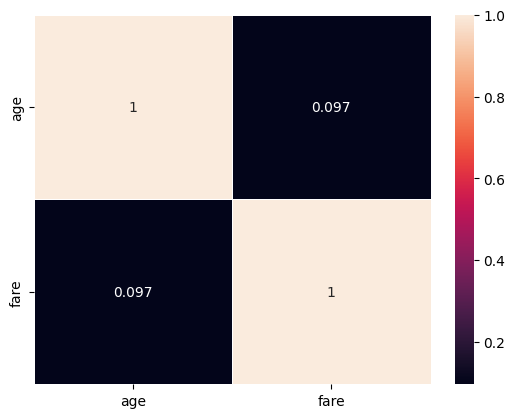

In [78]:
# create a correlation heatmap
sns.heatmap(df[['age','fare']].corr(), annot=True, cmap='rocket', linewidths=0.5)
